In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf
from copy import deepcopy

In [2]:
def Rx(x,f,meanx,meanf,sdx,sdf,NN) :
    return (np.mean(x*f) - meanx * meanf)/sdx/sdf

def dRdf(x,f,meanx,meanf,sdx,sdf,NN) :
    return (x - meanx)/NN/sdf/sdx - Rx(x,f,meanx,meanf,sdx,sdf,NN)*(f - meanf)/NN/sdf/sdf

def checkMonotone(x,y,f,meanx,meanf,sdx,sdf,NN,dRx) :
    tR = Rx(x,f,meanx,meanf,sdx,sdf,NN)
    lhs = ((x - meanx)/sdx) ** 2.0 
    rhs = (2*(x-meanx)/sdx*(f-meanf) - 3*tR/sdf*((f-meanf)**2) + (NN-1)*sdf*tR)/NN/NN/(sdf**3)
    return lhs - dRx*rhs

0.8854685276321717


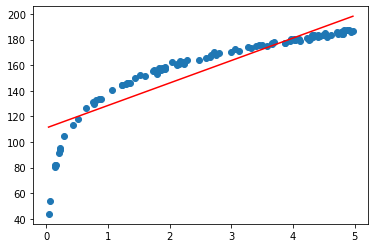

In [483]:
NN = 100
xs = np.sort((np.random.random(NN)*5).astype('float64'))
ys = (np.log(xs/0.01+1)*30 + np.random.randn(NN)*1).astype('float64')

A = np.vstack([xs,np.ones(NN)]).T
m, b = np.linalg.lstsq(A, ys, rcond=None)[0]
fys = (m*xs + b).astype('float64')

plt.scatter(xs,ys)
plt.plot(xs, fys, 'r')
print(Rx(xs,ys,np.mean(xs),np.mean(ys),np.sqrt(np.var(xs)),np.sqrt(np.var(ys)),NN))

0.8854685276321717
23145
0.8854771733118447


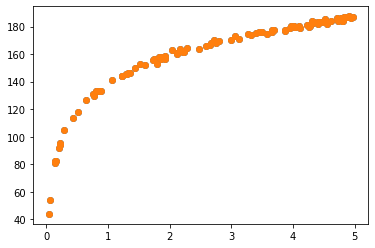

In [491]:
lastys = deepcopy(ys)

print(Rx(xs,lastys,np.mean(xs),np.mean(lastys),np.sqrt(np.var(xs)),np.sqrt(np.var(lastys)),NN))

dR = 1.0e-10;
K = 3   
skipcount = 0

for epoch in range(100000) :
    #print(Rx(xs,lastys,np.mean(xs),np.mean(lastys),np.sqrt(np.var(xs)),np.sqrt(np.var(lastys)),NN))
    
    Klist = range(NN) #np.random.choice([x for x in range(NN)],K) #range(NN)
        
    temp=(dR/dRdf(xs[Klist],lastys[Klist],np.mean(xs),np.mean(lastys),np.sqrt(np.var(xs)),np.sqrt(np.var(lastys)),NN).astype('float64'))
    #print(temp)
    temp[temp == inf] = 0
    temp[temp == -inf] = 0
    temp[np.abs(temp/lastys[Klist]) > 0.05] = 0
    
    tlastys = deepcopy(lastys)
    tlastys[Klist] = tlastys[Klist] + temp
    
    list1, list2 = zip(*sorted(zip(ys, tlastys)))
    
    #if (np.sum((checkMonotone(xs[Klist],lastys[Klist],lastys[Klist],np.mean(xs),np.mean(lastys),np.sqrt(np.var(xs)),np.sqrt(np.var(lastys)),NN,dR) <= 0).astype('float32')) > 0) :
    if np.sum(np.diff(list2) <= 0.) > 0 :
        #print('Redoing epoch ',epoch,' because monotonicity cannot be guaranteed')
        skipcount += 1;
        epoch = epoch - 1
        if dR < 1.0e-20 : break
        else : 
            dR = dR / 10.
            continue

    dR = dR * 2
    lastys[Klist] = deepcopy(tlastys[Klist])
    
    
print(skipcount)
plt.scatter(xs,ys);
plt.scatter(xs,lastys);
print(Rx(xs,lastys,np.mean(xs),np.mean(lastys),np.sqrt(np.var(xs)),np.sqrt(np.var(lastys)),NN))

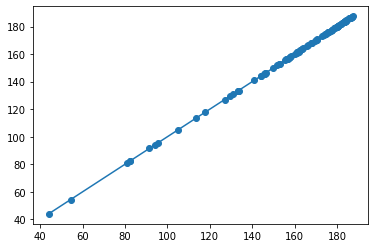

In [489]:
list1, list2 = zip(*sorted(zip(ys, lastys)))
plt.plot(list1,list2);
plt.scatter(ys, lastys)

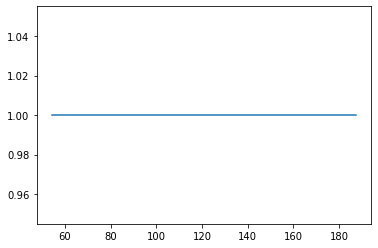

In [472]:
list1, list2 = zip(*sorted(zip(ys, lastys)))
plt.plot(list1[1:],np.diff(list2) > 0);